# t-SNE on MNIST Dataset

In [11]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [12]:
df = pd.read_csv("digit_train.csv")

In [13]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df_x = df.drop(["label"], axis=1)
df_labels = df["label"]

In [15]:
df_x.shape

(42000, 784)

#### Standardization

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
standardized_scalar = StandardScaler()
standardized_data = standardized_scalar.fit_transform(df_x)
standardized_data.shape

(42000, 784)

In [55]:
df_1000 = standardized_data[:15000, :]
labels_1000 = df_labels.head(15000)

### Compute t-SNE

In [56]:
from sklearn.manifold import TSNE

In [57]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=1000)

In [58]:
tsne_data = model.fit_transform(df_1000)

In [59]:
tsne_data = np.vstack((tsne_data.T, labels_1000)).T

In [60]:
tsne_df = pd.DataFrame(tsne_data, columns=["dim 1", "dim 2", "labels"])

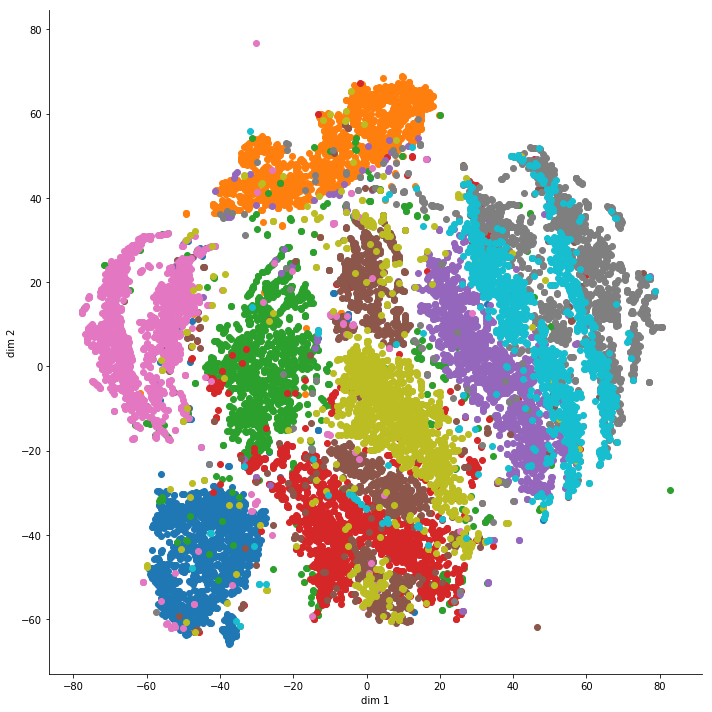

In [61]:
sns.FacetGrid(tsne_df, hue="labels", size=10).map(plt.scatter, "dim 1", "dim 2")
plt.show()